# Workshop 1 - Classification of Handwritten Digits from MNIST Dataset

### The objective of the workshop is to learn a simple machine learning workflow in order to solve a classic machine learning problem: classifying handwritten digits from 0-9

In [10]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, neural_network,metrics

# The digits dataset
digits = datasets.load_digits()

In [3]:
images_and_labels = list(zip(digits.images, digits.target))

In [9]:
images_and_labels[0][0].shape

(8, 8)

Classification report for classifier MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(256, 256, 128, 256, 512),
       learning_rate='constant', learning_rate_init=0.001, max_iter=200,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False):
             precision    recall  f1-score   support

          0       0.96      0.96      0.96        79
          1       0.95      0.90      0.92        80
          2       0.99      0.96      0.97        77
          3       0.96      0.88      0.92        80
          4       0.99      0.96      0.98        84
          5       0.93      0.96      0.95        82
          6       0.95      0.99      0.97        80
          7       0.93      1.00      0.96        80
          8       0.92      0.9

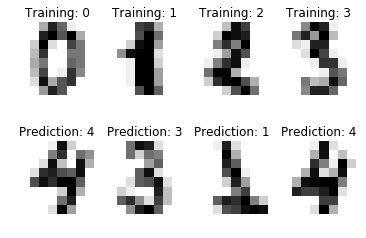

In [28]:
# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
# classifier = svm.SVC(gamma=0.001)
classifier = neural_network.MLPClassifier(hidden_layer_sizes=(256, 256,128,256,512,))

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2+100], digits.target[:n_samples // 2+100])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2+100:]
predicted = classifier.predict(data[n_samples // 2+100:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2+100:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

## Some things to play with during workshop, try changing the train_test split, create pivot variable to make code more legible, create parameters that can be changed so that users can easily change the model and evaluate the workflow

In [29]:
# Seeing is believing, sample a head of around 20 examples, between the expected output vs the predictions made by each
# classifier

In [30]:
# import a few classifiers, so that people can explore what those are